In [2]:
import numpy as np
import uproot
import matplotlib.pyplot as plt

In [3]:
myFile = uproot.open('TestFiles.root')

In [4]:
tree = myFile['TestTree']

In [5]:
eventId = tree.array('eventId')
pfoId = tree.array('pfoId')
driftPos = tree.array('hitDriftPositionsW')
wirePos = tree.array('hitWirePositionsW')
pdg = tree.array('bestMCParticlePdgCode')
isTrack = tree.array('bestMCParticleIsTrack')
completeness = tree.array('completeness')
purity = tree.array('purity')
nHitsW = tree.array('nHitsInPfoW')
nHitsU = tree.array('nHitsInPfoU')
nHitsV = tree.array('nHitsInPfoV')
vertexdriftPos = tree.array('vertexDriftPosition')
vertexwirePos = tree.array('vertexWirePositionW')

In [6]:
drift_pos_av = driftPos.mean()
wire_pos_av = wirePos.mean()

In [7]:
drift_comp = driftPos - drift_pos_av
wire_comp = wirePos - wire_pos_av
drift_comp_sq = drift_comp ** 2
numerator = (drift_comp * wire_comp).sum()
denominator = (drift_comp_sq).sum()
m = numerator / denominator
c = wire_pos_av - m * drift_pos_av

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [8]:
pfo_hits = np.array([ len(x) for x in wirePos])

track_pfos = np.where((completeness > 0.9) & (purity > 0.9) & (pfo_hits > 0) & (isTrack == 1))

shower_pfos = np.where((completeness > 0.9) & (purity > 0.9) & (pfo_hits > 0) & (isTrack == 0))

select_wirePos_tracks = wirePos[track_pfos]

select_driftPos_tracks = driftPos[track_pfos]

select_wirePos_showers = wirePos[shower_pfos]

select_driftPos_showers = driftPos[shower_pfos]

m_tracks = m[track_pfos]

c_tracks = c[track_pfos]

m_showers = m[shower_pfos]

c_showers = c[shower_pfos]

# Tracks: Plot regression line

In [56]:
y_values_tracks = []
m_values_tracks = []
c_values_tracks = []

for i in range(len(track_pfos[0])):
        
    y = m_tracks[i]*select_driftPos_tracks[i] + c_tracks[i]
#     fig = plt.figure(figsize = (10, 15))
#     plt.scatter(select_driftPos_tracks[i], select_wirePos_tracks[i], color = 'b')
#     plt.plot(select_driftPos_tracks[i], y, color = 'r', linewidth = 3) 
#     plt.scatter(last_x_tracks[i], last_y_tracks[i], color = 'g', s = 150)
    
    y_values_tracks.append(y)

    m_values_tracks.append(m_tracks[i])

    c_values_tracks.append(c_tracks[i])

# Showers: Plot regression line

In [57]:
y_values_showers = []
m_values_showers = []
c_values_showers = []

for i in range(len(shower_pfos[0])):
        
    y = m_showers[i]*select_driftPos_showers[i] + c_showers[i]
#     fig = plt.figure(figsize = (10, 15))
#     plt.scatter(select_driftPos_showers[i], select_wirePos_showers[i], color = 'b')
#     plt.plot(select_driftPos_showers[i], y, color = 'r', linewidth = 3) 

    y_values_showers.append(y)
    
    m_values_showers.append(m_showers[i])

    c_values_showers.append(c_showers[i])

# Tracks: Get first and last x and y values of regression line

In [58]:
y_values_tracks_sorted = []

for i in range(len(y_values_tracks)):
    y_values_tracks_sorted.append(np.sort(y_values_tracks[i]))

In [59]:
first_y_tracks = []
first_x_tracks = []
last_y_tracks = []
last_x_tracks = []

for i in range(len(y_values_tracks)):
    
    first_y = y_values_tracks_sorted[i][0]
    
    first_y_tracks.append(first_y)
    
    first_x = ((y_values_tracks_sorted[i][0]) - c_values_tracks[i]) / m_values_tracks[i]
    
    first_x_tracks.append(first_x)
    
    last_y_tracks.append(y_values_tracks_sorted[i][-1])
    
    last_x = ((y_values_tracks_sorted[i][-1]) - c_values_tracks[i]) / m_values_tracks[i]
    
    last_x_tracks.append(last_x)

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


In [60]:
len(first_y_tracks)

22431

In [61]:
len(first_x_tracks)

22431

# Showers: Get first and last x and y values of regression line

In [62]:
y_values_showers_sorted = []

for i in range(len(y_values_showers)):
    y_values_showers_sorted.append(np.sort(y_values_showers[i]))

In [63]:
first_y_showers = []
first_x_showers = []
last_y_showers = []
last_x_showers = []

for i in range(len(y_values_showers)):
    
    first_y = y_values_showers_sorted[i][0]
    
    first_y_showers.append(first_y)
    
    first_x = ((y_values_showers_sorted[i][0]) - c_values_showers[i]) / m_values_showers[i]
    
    first_x_showers.append(first_x)
    
    last_y_showers.append(y_values_showers_sorted[i][-1])
    
    last_x = ((y_values_showers_sorted[i][-1]) - c_values_showers[i]) / m_values_showers[i]
    
    last_x_showers.append(last_x)

# Tracks: angle betweeen regression line and each hit

In [71]:
av_theta_track = []

for i in range(len(track_pfos[0])):
    
    if m_values_tracks[i] > 0:
        line_theta_track = np.degrees(np.arctan2(first_y_tracks[i], first_x_tracks[i])) 
        hit_theta_track = np.degrees(np.arctan2(select_wirePos_tracks[i], select_driftPos_tracks[i]))
        
    else:
        line_theta_track = np.degrees(np.arctan2(last_y_tracks[i], last_x_tracks[i])) 
        hit_theta_track = np.degrees(np.arctan2(select_wirePos_tracks[i], select_driftPos_tracks[i]))

    theta_track = abs(line_theta_track - hit_theta_track)
    
    av_theta_track.append(theta_track.mean())

# Showers: angle between regression line and each hit

In [77]:
av_theta_shower = []

for i in range(len(shower_pfos[0])):
    
    if m_values_showers[i] > 0:
        line_theta_showers = np.degrees(np.arctan2(first_y_showers[i], first_x_showers[i])) 
        hit_theta_shower = np.degrees(np.arctan2(select_wirePos_showers[i], select_driftPos_showers[i]))
        
    else:
        line_theta_shower = np.degrees(np.arctan2(last_y_showers[i], last_x_showers[i])) 
        hit_theta_shower = np.degrees(np.arctan2(select_wirePos_showers[i], select_driftPos_showers[i]))

    theta_shower = abs(line_theta_shower - hit_theta_shower)
    
    av_theta_shower.append(theta_shower.mean())

# PLOTS

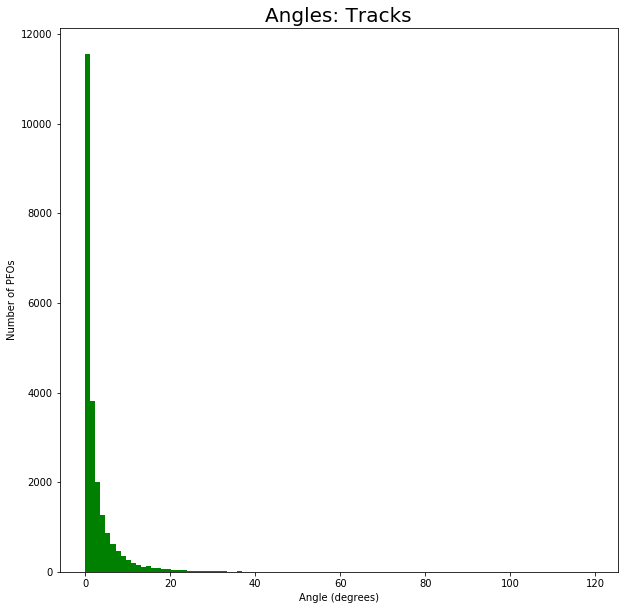

In [83]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(av_theta_track, 100, color = 'g')
plt.title('Angles: Tracks', fontsize = 20)
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of PFOs')

plt.show()

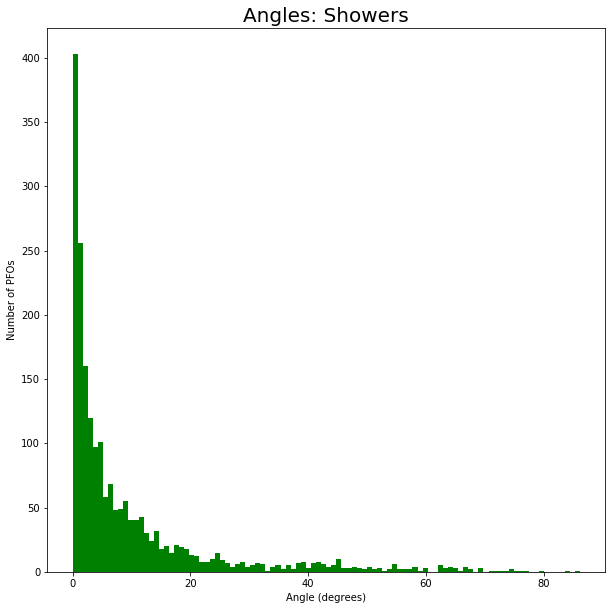

In [84]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(av_theta_shower, 100, color = 'g')
plt.title('Angles: Showers', fontsize = 20)
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of PFOs')

plt.show()

In [85]:
weight_tracks = np.ones_like(av_theta_track) / len(av_theta_track)
weight_showers = np.ones_like(av_theta_shower) / len(av_theta_shower)

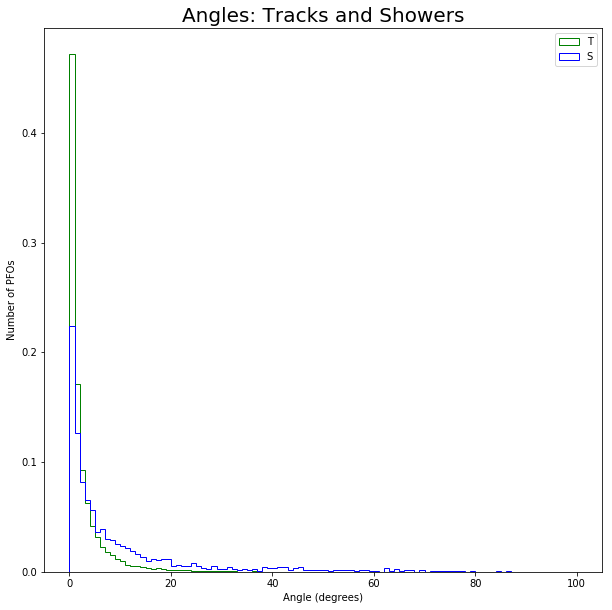

In [86]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(av_theta_track, 100, (0, 100), weights = weight_tracks, color = 'g', histtype = u'step')
plt.hist(av_theta_shower, 100, (0, 100), weights = weight_showers, color = 'b', histtype = u'step')
plt.title('Angles: Tracks and Showers', fontsize = 20)
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of PFOs')


plt.legend('TS')
        
plt.show()